<div align='center'><font size="5" color="#00000"><center><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"> PySaDML </h1></center></font></div> <br>
<div align='center'><font size="4" color="#00000"><center><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"> Analyse Exploratoire des Données. </h1></center></font></div>

<div align='center'><font size="2" color="#00000"><center><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"> Détection de son anormal dans les pièces industrielles </h1></center></font></div>
<br>

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Le jeu de données : DCASE

---

Voici [un article](http://dcase.community/challenge2020/task-unsupervised-detection-of-anomalous-sounds) que vous pouvez consulter pour approfondir sur le sujet de la détection non supervisée de sons anormaux pour la surveillance de l'état des machines.

L'ensemble de données de développement est téléchargé à partir d'[ici](https://zenodo.org/record/3678171) et contient **30987** fichiers audio.

![](./../images/pictures/image01.png)

#### Analyse de Forme :
* Variable cible à analyser : `condition` ou `machine_type`

* Type des variables cible : `qualitative`

* Type des variables caractéristique : `quantitative`

* Ensemble de données de test : **10868 fichiers** comprenant :
  * 5469 sons anormaux
  * 5399 sons normaux
  
* Ensemble de données d'entraînement : **20119 fichiers** comprenant uniquement des sons normaux

* Analyse des valeurs manquantes :
    - pas de NaN
    
<table>
    <thead>
        <h4>Description des données</h4>
    </thead>
    <tbody>
        <tr>
            <td>pathname</td>
            <td>&nbsp;</td>
            <td>Le chemin du fichier audio contenu dans le dossier `dev_data`.</td>
        </tr>
        <tr>
            <td>filename</td>
            <td>&nbsp;</td>
            <td>Le nom du fichier audio.</td>
        </tr>
        <tr>
            <td>machine_id</td>
            <td>&nbsp;</td>
            <td>l'identifiant de chaque machine pour un même type de machine</td>
        </tr>
        <tr>
            <td>sample_id</td>
            <td>&nbsp;</td>
            <td>l'identifiant de l'échantillon de chaque son.</td>
        </tr>
        <tr>
            <td>audio_format</td>
            <td>&nbsp;</td>
            <td>le type du format audio (*.wav).</td>
        </tr>
        <tr>
            <td>machine_type</td>
            <td>&nbsp;</td>
            <td>Le type de machine.</td>
        </tr>
        <tr>
            <td>machine_kind</td>
            <td>&nbsp;</td>
            <td>Le genre de la machine (jouet ou réel).</td>
        </tr>
        <tr>
            <td>data_split</td>
            <td>&nbsp;</td>
            <td>Le répertoire contenant les données de test et de train.</td>
        </tr>
        <tr>
            <td>condition</td>
            <td>&nbsp;</td>
            <td>Descritption des sons : normaux et anormaux (normal/anomaly).</td>
        </tr>
        <tr>
            <td>durations</td>
            <td>&nbsp;</td>
            <td>La durée du fichier audio à analyser</td>
        </tr>
        <tr>
            <td>sampligrate</td>
            <td>&nbsp;</td>
            <td>La fréquence d'échantillonage du fichier audio.</td>
        </tr>
    </tbody>
</table>

#### Propriétés des sons audios

Les principales caractéristiques qui décrivent les fichiers audios numérique que nous voulons analyser sont :

* fréquence d'échantillonnage (sampligrate) : échantillons par seconde exprimés en kilohertz (kHz) ; liée à la qualité audio.
* Durées (durations) : durée du son en secondes.

Les données ayant des propriétés audio différentes auront également une forme ou une structure différente. Notre première tâche consiste à déterminer comment ces différentes propriétés audio sont réparties dans l'ensemble de données et à évaluer comment nous pouvons les normaliser, par exemple par conversion.
<br/>
<br/>

**L'utilisation de ce jeu de données, nécéssite de citer les trois articles suivants :**

**Yuma Koizumi, Shoichiro Saito, Noboru Harada, Hisashi Uematsu, and Keisuke Imoto, "ToyADMOS: A Dataset of Miniature-Machine Operating Sounds for Anomalous Sound Detection," in Proc of Workshop on Applications of Signal Processing to Audio and Acoustics (WASPAA), 2019. [pdf](https://ieeexplore.ieee.org/document/8937164)**

**Harsh Purohit, Ryo Tanabe, Kenji Ichige, Takashi Endo, Yuki Nikaido, Kaori Suefusa, and Yohei Kawaguchi, “MIMII Dataset: Sound Dataset for Malfunctioning Industrial Machine Investigation and Inspection,” in Proc. 4th Workshop on Detection and Classification of Acoustic Scenes and Events (DCASE), 2019. [pdf](http://dcase.community/documents/workshop2019/proceedings/DCASE2019Workshop_Purohit_21.pdf)**

**Yuma Koizumi, Yohei Kawaguchi, Keisuke Imoto, Toshiki Nakamura, Yuki Nikaido, Ryo Tanabe, Harsh Purohit, Kaori Suefusa, Takashi Endo, Masahiro Yasuda, and Noboru Harada, "Description and Discussion on DCASE2020 Challenge Task2: Unsupervised Anomalous Sound Detection for Machine Condition Monitoring," in arXiv e-prints: 2006.05822, 2020. [URL](https://arxiv.org/abs/2006.05822)**

# 1. Initialisation<a id="1"></a>
---

### 1.1 Configuration<a id="1.1"></a>

!pip install feather-format
!pip install librosa

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# =============================================================================
# Created By  : Mike G
# Created Date: Thursday Nov 25 15:00:00 UTC 2021
# =============================================================================
import time, datetime
import librosa

# Required libraries
import pandas as pd
import numpy as np
# Initialisation:
import random
np.random.seed(999)

from include import common
from pathlib import Path

# visualisations
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

#show pandas version
pd.__version__

'1.3.5'

### 1.2 Variables des fonctions `Librosa`<a id="1.2"></a>
Ces paramètres sont utilisés pour extraire les caractéristiques des fichiers sonores.

In [6]:
"""
  n_mfcc (integer)     - number of MFCCs (default: 20)
  n_mels (integer)     - number of Mel buckets (default: 64)
  n_fft (integer)      - length of the windowed signal to compute the short Fourier transform on
  hop_length (integer) - window increment when computing STFT

"""
n_mfcc = 40         #number of MFCCs to return 20 by default

n_mels = 64         #The number refers to the number Mel bands, or “bins”, 64; 128 that our Mel scale will be broken up into

n_fft = 2**13       #Fourier transformation window describes the size of the window that will be used 
                    #when performing each discrete Fourier transformation across the audio signal
        
hop_length = 2**11  #describes how much this window is to be shifted along the audio signal during each step of STFT processing


### 1.3 Constantes des répertoires<a id="1.3"></a>

In [7]:
#---------------------------------------------------------------------------------------------
# Extension of the dataset file
EXT = '.csv'

# The HOME directory of data audio dev and eval
DATASET_ROOT = './../data'

# The folders in which the audio samples are.
AUDIO_SUBFOLDER = '/dev_data'

DATASET_AUDIO_PATH = Path(DATASET_ROOT + AUDIO_SUBFOLDER)

# If folder dev_data does not exist, create it, otherwise do nothing
Path(DATASET_AUDIO_PATH).mkdir(parents=True, exist_ok=True)

In [8]:
!tree ./{DATASET_AUDIO_PATH}

Structure du dossier pour le volume OS
Le num‚ro de s‚rie du volume est 00000003 A4CC:8E40
C:\USERS\GUIDY\DOCUMENTS\GITHUB\PYSADML\DATA\DEV_DATA
ÃÄÄÄfan
³   ÃÄÄÄtest
³   ÀÄÄÄtrain
ÃÄÄÄpump
³   ÃÄÄÄtest
³   ÀÄÄÄtrain
ÃÄÄÄslider
³   ÃÄÄÄtest
³   ÀÄÄÄtrain
ÃÄÄÄToyCar
³   ÃÄÄÄtest
³   ÀÄÄÄtrain
ÃÄÄÄToyConveyor
³   ÃÄÄÄtest
³   ÀÄÄÄtrain
ÀÄÄÄvalve
    ÃÄÄÄtest
    ÀÄÄÄtrain


## 2. Exploration des données audio

### 2.1 Chargement des données audio

In [9]:
df = common.load_metadata(DATASET_AUDIO_PATH, EXT) #les données obtenues sont mélangées

df.head()

Chargement du fichier <dev_data.csv> des métadonnées audio...
Terminé.


,pathname,filename,machine_id,sample_id,audio_format,machine_type,machine_kind,data_split,condition,durations,samplingrate
0,..\data\dev_data\ToyCar\test\anomaly_id_01_000...,anomaly_id_01_00000092.wav,id_01,00000092,.wav,ToyCar,real_machine,test,anomaly,11.0,16000
1,..\data\dev_data\valve\train\normal_id_02_0000...,normal_id_02_00000037.wav,id_02,00000037,.wav,valve,real_machine,train,normal,10.0,16000
2,..\data\dev_data\slider\train\normal_id_02_000...,normal_id_02_00000429.wav,id_02,00000429,.wav,slider,real_machine,train,normal,10.0,16000
3,..\data\dev_data\pump\train\normal_id_02_00000...,normal_id_02_00000297.wav,id_02,00000297,.wav,pump,real_machine,train,normal,10.0,16000
4,..\data\dev_data\ToyConveyor\train\normal_id_0...,normal_id_01_00000095.wav,id_01,00000095,.wav,ToyConveyor,real_machine,train,normal,10.0,16000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30987 entries, 0 to 30986
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pathname      30987 non-null  object 
 1   filename      30987 non-null  object 
 2   machine_id    30987 non-null  object 
 3   sample_id     30987 non-null  object 
 4   audio_format  30987 non-null  object 
 5   machine_type  30987 non-null  object 
 6   machine_kind  30987 non-null  object 
 7   data_split    30987 non-null  object 
 8   condition     30987 non-null  object 
 9   durations     30987 non-null  float64
 10  samplingrate  30987 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 2.6+ MB


Statistiques sommaires pour chacunes des variables numériques afin de voir s'il y a de grandes différences entre les valeurs telles que les quartiles, la moyenne et le maximum.

In [11]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,durations,samplingrate
count,30987.00,30987.00
mean,10.21,16000.00
std,0.41,0.00
min,10.00,16000.00
25%,10.00,16000.00
50%,10.00,16000.00
75%,10.00,16000.00
max,11.00,16000.00


**On constate que la variable `samplingrate` à la même valeur sur l'ensemble des données de développement.**

- mean(samplingrate) = 16,000 Hz.
- max(samplingrate) = 16,000 Hz.
- min(samplingrate) = 16,000 Hz.
- std(samplingrate) = 0.

**On constate que la variable `durations` contient deux valeurs:**

- max(durations) = 10s.
- min(durations) = 11s.


### 2.2 Détermination de la distribution des propriétés audio
- Fréquence d'échantillonnage(samplingrate)
- durée d'échantillonnage(durations). 

**Comment cet ensemble de données est-il distribué par rapport à ces propriétés ?**

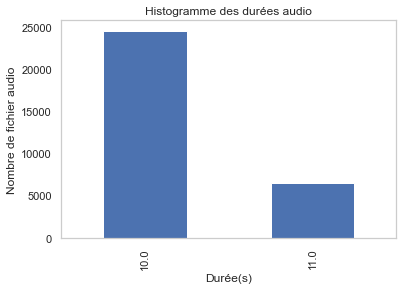

,durée,Nombre,Moyenne
0,10.0s,24528,79.2%
1,11.0s,6459,20.8%


In [12]:
common.audio_properties(df)

**79,2% de l'ensemble de données ont une durée égale à 10 secondes.**

**20,8% de l'ensemble des données ont une durée égale à 11 secondes.**

In [ ]:
df = dataframe[['durations']]
serie = df['durations'].value_counts()

serie.plot(kind='bar')
plt.xlabel('Durée(s)')
plt.ylabel('Nombre de fichier audio')
plt.title('Histogramme des durées audio')
plt.grid(False)
plt.show()

df_serie = pd.DataFrame(serie)
df_serie.reset_index(inplace=True)
df_serie = df_serie.rename(columns = {'index':'durée', 'durations':'Nombre'})
tot = df_serie['Nombre'].sum()
df_serie['Moyenne'] = df_serie['Nombre'].apply(lambda x: 100*(x/tot)).map('{:,.1f}%'.format)
df_serie['durée'] = df_serie['durée'].map('{:,.1f}s'.format)

display(df_serie)


In [48]:
import plotly.express as px
serie = pd.DataFrame(df['durations'].astype(int).value_counts()).reset_index().rename(columns = {'index':'durée', 'durations':'Nombre'})
#serie.reset_index(inplace=True).rename(columns = {'index':'durée', 'durations':'Nombre'})
#serie = serie.rename(columns = {'index':'durée', 'durations':'Nombre'})
#px.bar(serie, x='Regional indicator', y='Ladder score', color='Regional indicator')
#.plot(kind='bar')

<AxesSubplot:>

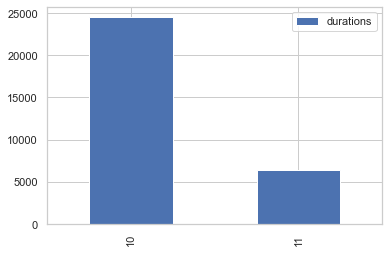

In [63]:
pd.DataFrame(df['durations'].astype(int).value_counts()).plot(kind='bar')

### 2.3 Déterminer la distribution des classes dans nos données
Comment les échantillons sont-ils répartis entre les différents id et types de machines ?

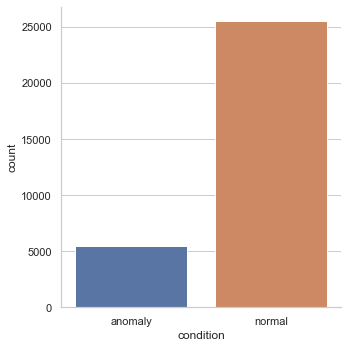

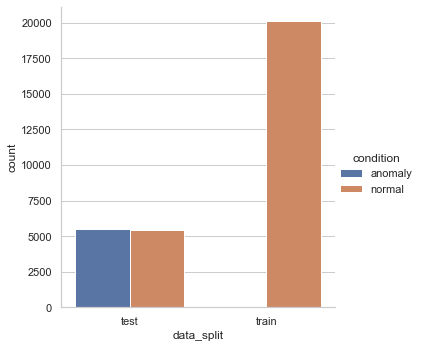

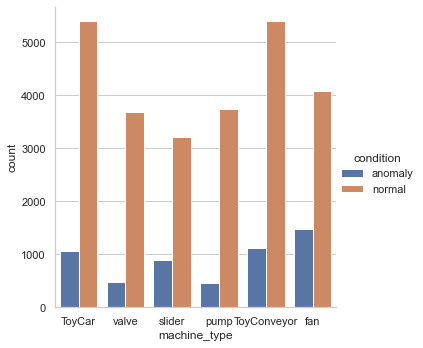

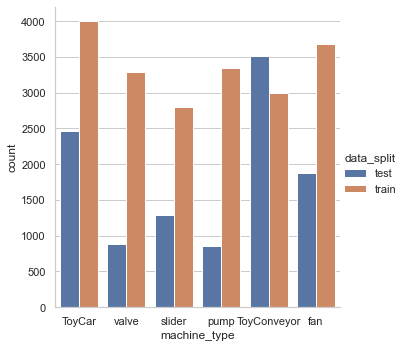

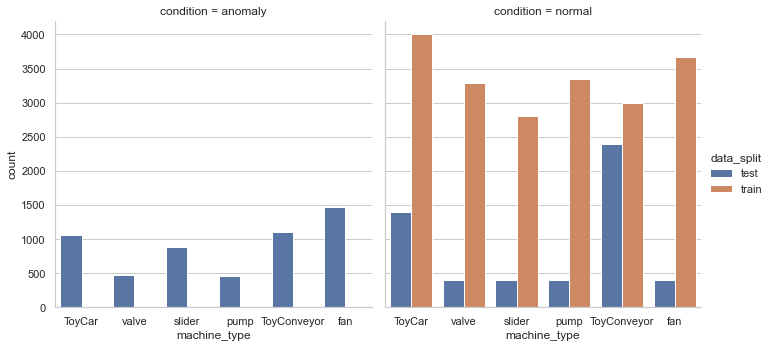

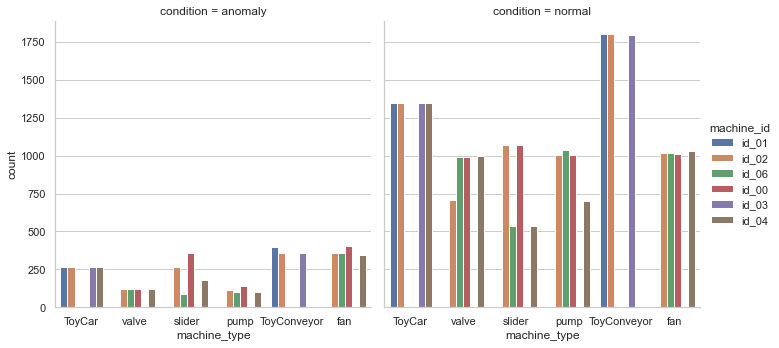

In [9]:
common.plot_catplot(df)

**Nous pouvons clairement voir ici qu'il y a un déséquilibre entre la répartion des sons anormaux et normaux de l'ordre de 1 pour 5.**

***les données de test**

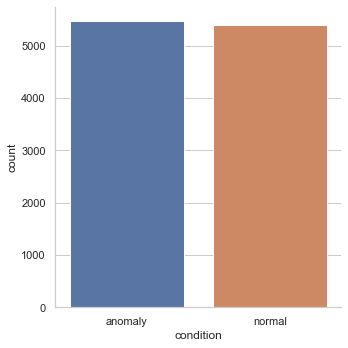

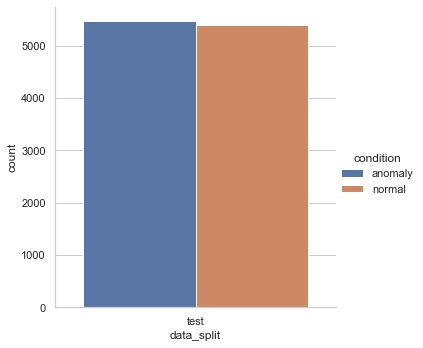

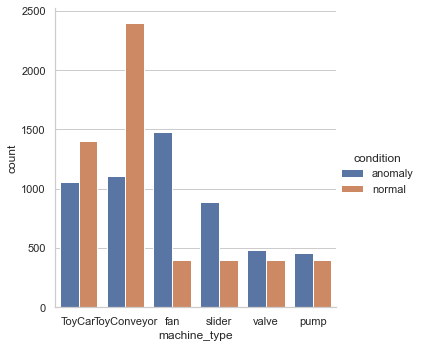

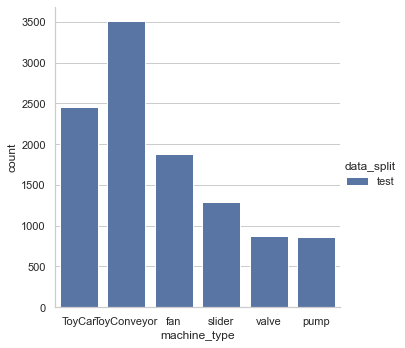

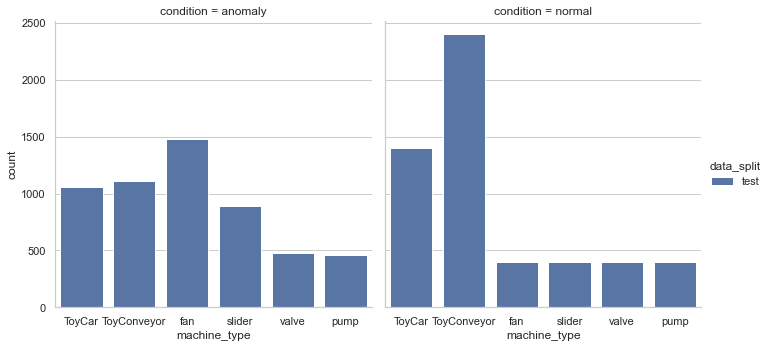

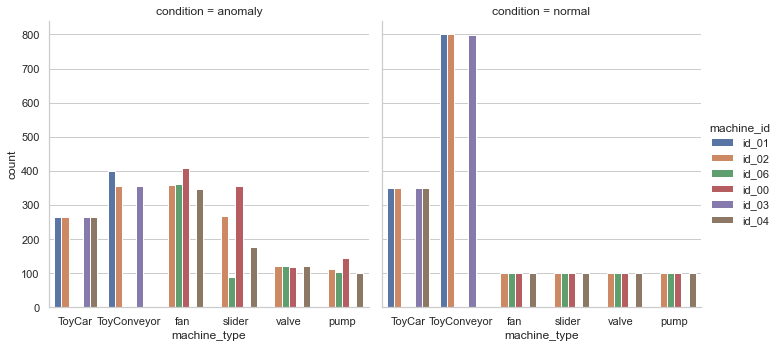

In [10]:
common.plot_catplot(df, data_split='test')

***les données d'entrainements**

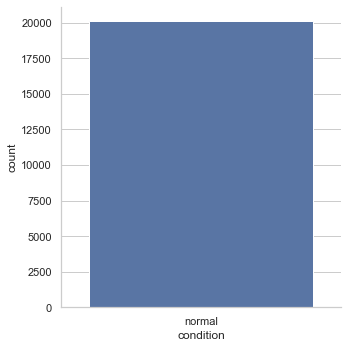

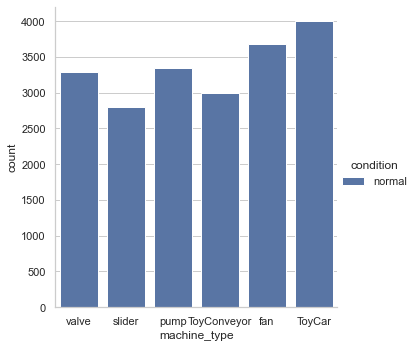

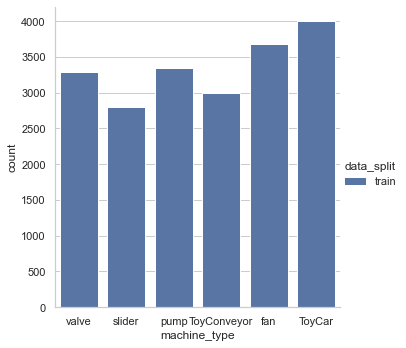

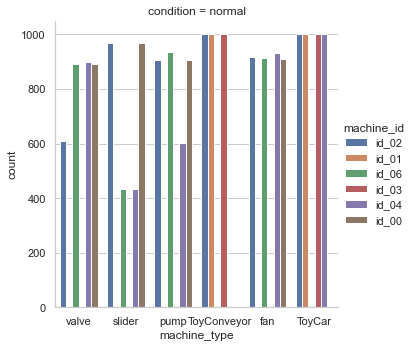

In [11]:
common.plot_catplot(df, data_split='train')

## 3. Écoute et visualisation des fichiers audio

Nous allons écouter et afficher quelques échantillons aléatoires par type de machine tout en examinant également les propriétés audio numériques de chaque cas.<br/>

### 3.1 Waveform

#### 3.1.1 Fan machine

In [12]:
machine_type = 'fan'
fan_anomaly = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'anomaly')].sample(1).iloc[0]
fan_normal = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'normal')].sample(1).iloc[0]

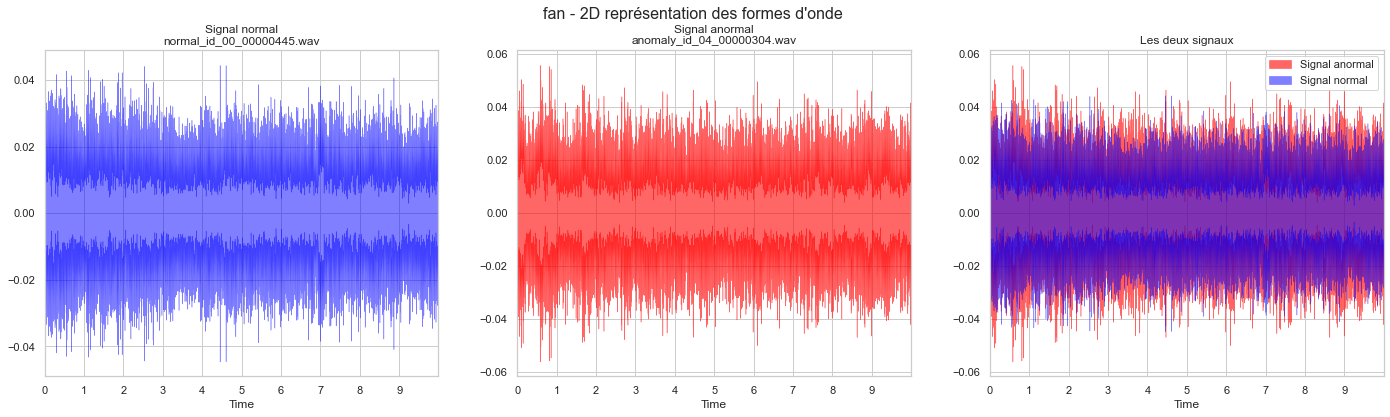

In [13]:
common.display_both_audio(fan_normal, fan_anomaly, machine_type)

Fichier:  ..\data\dev_data\fan\test\anomaly_id_04_00000304.wav
Fréquence d'échantillonnage: 16000
Durée: 10.0 seconds


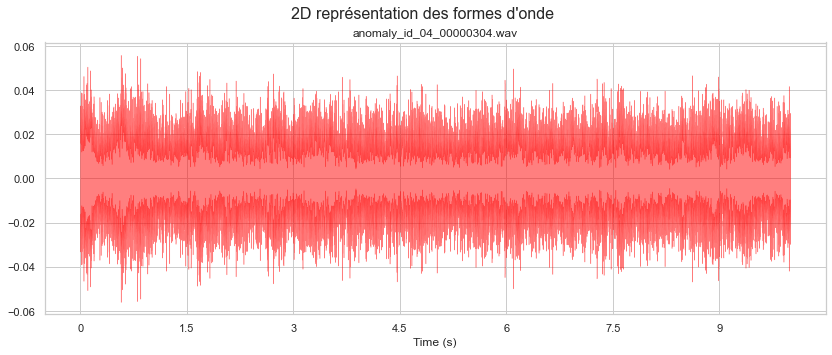

In [14]:
common.display_audio(fan_anomaly)

Fichier:  ..\data\dev_data\fan\train\normal_id_00_00000445.wav
Fréquence d'échantillonnage: 16000
Durée: 10.0 seconds


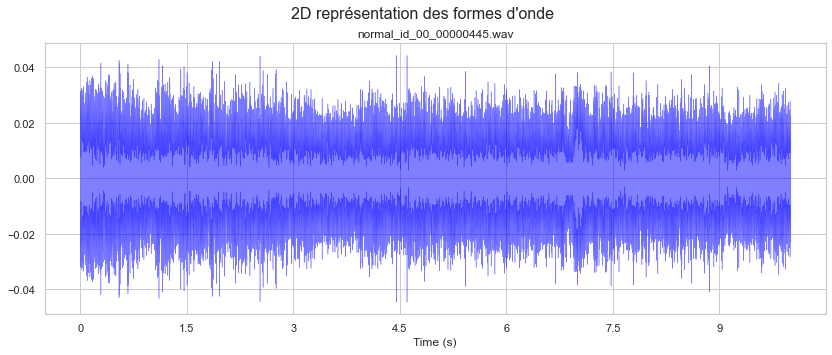

In [15]:
common.display_audio(fan_normal)

#### 3.1.2 Pump machine

In [16]:
#machine_type = 'pump'
#pump_anomaly = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'anomaly')].sample(1).iloc[0]
#pump_normal = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'normal')].sample(1).iloc[0]

In [17]:
#common.display_both_audio(pump_normal, pump_anomaly, machine_type)

In [18]:
#common.display_audio(pump_anomaly)

In [19]:
#common.display_audio(pump_normal)

#### 3.1.3 Slider machine

In [20]:
#machine_type = 'slider'
#slider_anomaly = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'anomaly')].sample(1).iloc[0]
#slider_normal = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'normal')].sample(1).iloc[0]

In [21]:
#common.display_both_audio(slider_normal, slider_anomaly, machine_type)

In [22]:
#common.display_audio(slider_anomaly)

In [23]:
#common.display_audio(slider_normal)

#### 3.1.4 ToyCar machine

In [24]:
#machine_type = 'ToyCar'
#ToyCar_anomaly = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'anomaly')].sample(1).iloc[0]
#ToyCar_normal = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'normal')].sample(1).iloc[0]

In [25]:
#common.display_both_audio(ToyCar_normal, ToyCar_anomaly, machine_type)

In [26]:
#common.display_audio(ToyCar_anomaly)

In [27]:
#common.display_audio(ToyCar_normal)

#### 3.1.5 ToyConveyor machine

In [28]:
#machine_type = 'ToyConveyor'
#ToyConveyor_anomaly = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'anomaly')].sample(1).iloc[0]
#ToyConveyor_normal = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'normal')].sample(1).iloc[0]

In [29]:
#common.display_both_audio(ToyConveyor_normal, ToyConveyor_anomaly, machine_type)

In [30]:
#common.display_audio(ToyConveyor_anomaly)

In [31]:
#common.display_audio(ToyConveyor_normal)

#### 3.1.6 Valve machine

In [32]:
#machine_type = 'valve'
#valve_anomaly = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'anomaly')].sample(1).iloc[0]
#valve_normal = df.pathname.loc[(df.machine_type == machine_type) & (df.condition == 'normal')].sample(1).iloc[0]

In [33]:
#common.display_both_audio(valve_normal, valve_anomaly, machine_type)

In [34]:
#common.display_audio(valve_anomaly)

In [35]:
#common.display_audio(valve_normal)

**On observe ceci : <br>
1- Les audios ont des amplitudes différentes.<br>
2- le son audio est peu audible.**<br>

**Faut il amplifier tous les sons durant l'extraction des features?**<br>
**Faut il normaliser ou standardiser tous les sons durant l'extraction des features?**
<br><br>

Rappel :
* La `standardisation` redéfinit l'échelle d'un ensemble de données afin d'obtenir une moyenne de 0 et un écart-type de 1. 
    * Elle est utile lorsque la distribution des caractéristiques est normale ou gaussienne.
    * Elle est utile pour les algorithmes d'optimisation, tels que la descente de gradient, qui sont utilisés dans les algorithmes d'apprentissage automatique.<br>
<i>La standardisation est plus robuste aux valeurs aberrantes, et dans de nombreux cas, elle est préférable à la normalisation Max-Min.</i>
<br><br>
* La `normalisation` redéfinit l'échelle d'un ensemble de données de manière à ce que chaque valeur soit comprise entre 0 et 1. 
    * Elle est utile lorsque nous ne connaissons pas la distribution, à savoir aussi que La normalisation ne traite pas très bien les outliners. 
    * La normalisation est utile lorsque vous savez que la distribution de vos données ne suit pas une distribution gaussienne.<br> 
<i>Cela peut être utile dans les algorithmes qui ne supposent aucune distribution des données.<i>
    
En résumé :
* Les variables standardisées seront sans unité et auront une variance similaire.

* La normalisation est une méthode conseillée pour la transformation des données lorsque les variables de l'ensemble de données d'origine ont été mesurées sur une échelle sensiblement différente.

* Dans certains cas, il n'est pas nécessaire de normaliser l'ensemble de données car la variation originale de l'ensemble de données est importante (Gewers et al., 2018).

### 3.2 Spectrogramme

Le spectrogramme est un diagramme représentant le spectre d'un phénomène périodique, associant à chaque fréquence une intensité ou une puissance. <br>
L'échelle des fréquences et celle des puissances ou intensités peuvent être linéaires ou logarithmiques. <br>
C'est un graphique tridimensionnel, dans lequel :

* **le temps est sur l'axe des abscisses, la fréquence sur l'axe des ordonnées.**

* **et l'importance d'une composante spectrale (amplitude) est indiquée par un niveau de couleur.**<br>

Des études ont montré que les humains ne perçoivent pas les fréquences sur une échelle linéaire mais sur une échelle logarithmique. <br>
Nous détectons mieux les différences dans les basses fréquences que dans les hautes fréquences. <br>
Par exemple, nous pouvons facilement faire la différence entre 500 et 1000 Hz, mais nous aurons du mal à faire la différence entre 10 000 et 10 500 Hz, même si la distance entre les deux paires est la même...

Cela nous permet de repérer des modèles périodiques dans le temps et des régions d'activité.

Pour afficher cela, nous utilisons la librairie `librosa.display.specshow`.


**Il existe plusieurs types de spectrogrammes à visualiser.**


#### 3.2.1 Quelques exemples pour la machine type - `fan`

##### 3.2.1.1 Spectre
Le spectre d'un signal discret est calculé à l'aide de la transformée de Fourier rapide (FFT) et affiche la magnitude (ou l'énergie) à chaque fréquence dans un signal.

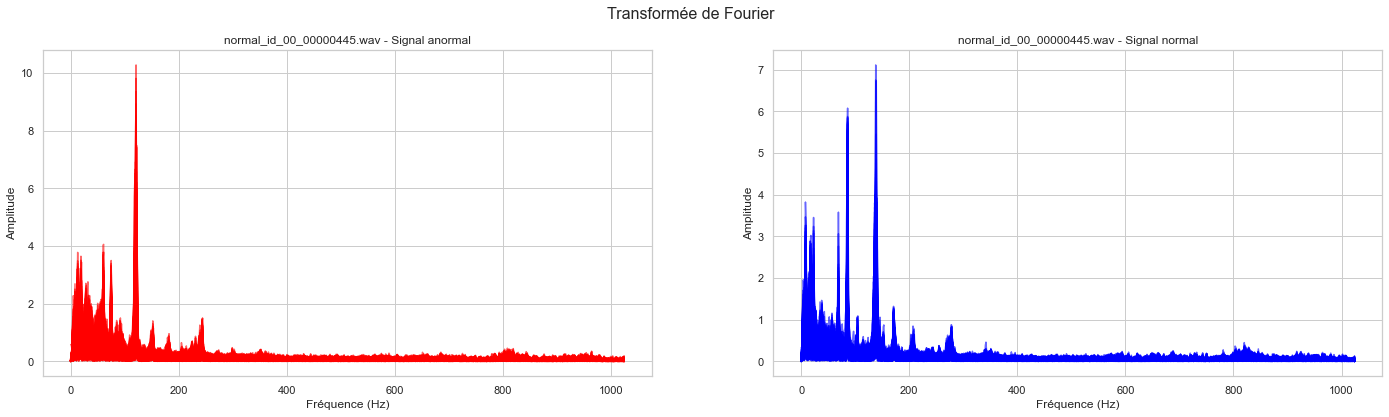

In [36]:
common.display_spectrum(fan_anomaly, fan_normal, size=(24, 6))

##### 3.2.1.2 Densité spectrale de puissance en utilisant la méthode de Welch.

Le spectre de puissance d'un signal décrit la distribution de la puissance dans les composantes de fréquence qui composent ce signal.



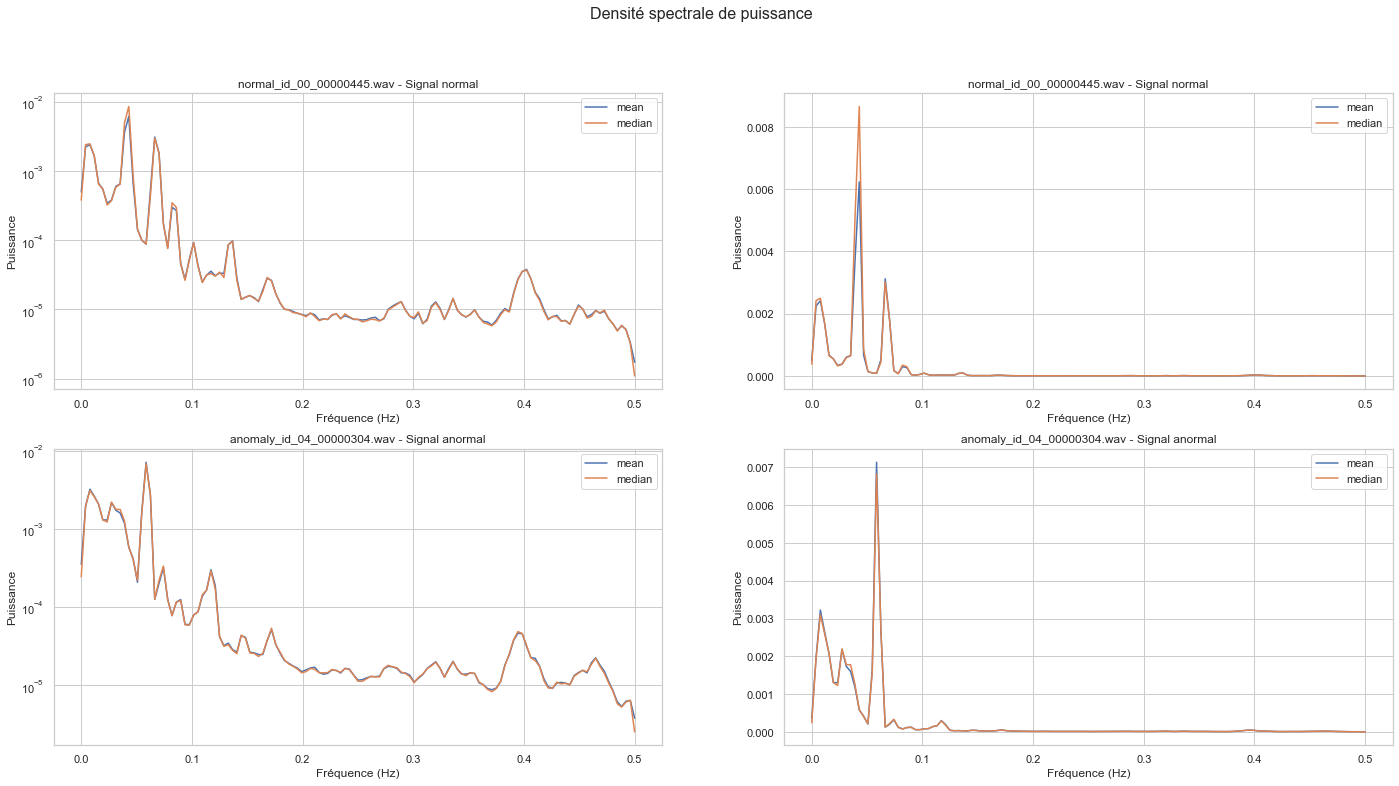

In [37]:
common.display_powerspectraldensity(fan_anomaly, fan_normal, size=(24, 12))

##### 3.2.1.3 Spectrogramme de puissance à fréquence linéaire

Un spectrogramme de puissance à fréquence linéaire représente la puissance en dB du signal audio avec le temps sur l'axe des abscisses et la fréquence en Hz sur une échelle linéaire sur l'axe des ordonnées.

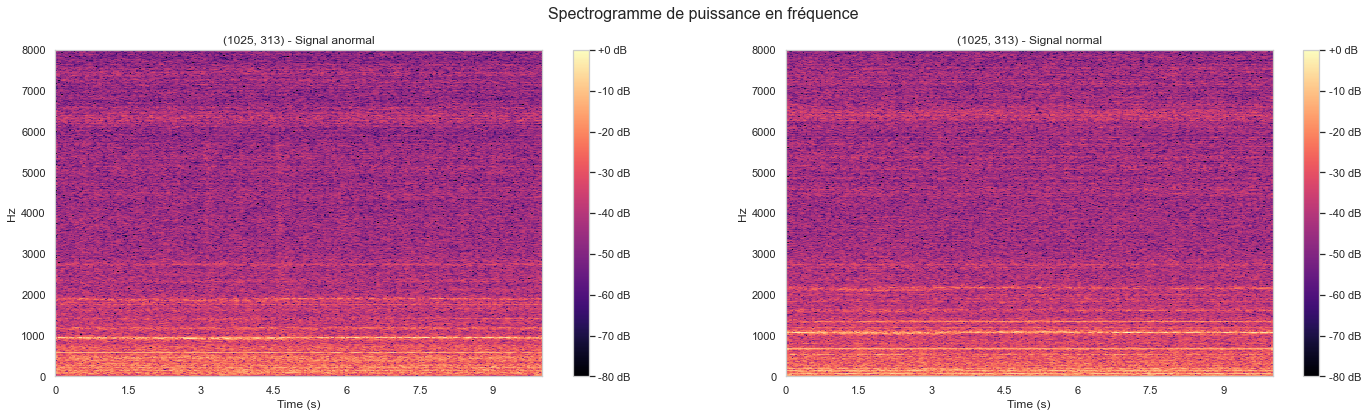

In [38]:
common.display_powerspectrogram(fan_anomaly, fan_normal, y_axis='linear', size=(24, 6))

##### 3.2.1.4 Spectrogramme de puissance log-fréquence

Ce spectrogramme présente les mêmes informations, mais avec une échelle logarithmique sur l'axe des ordonnées pour les fréquences. 
Parfois, comme dans notre cas, il s'agit d'une meilleure échelle si la plupart des informations sont situées sur les basses fréquences et que certains bruits se trouvent sur les hautes fréquences.

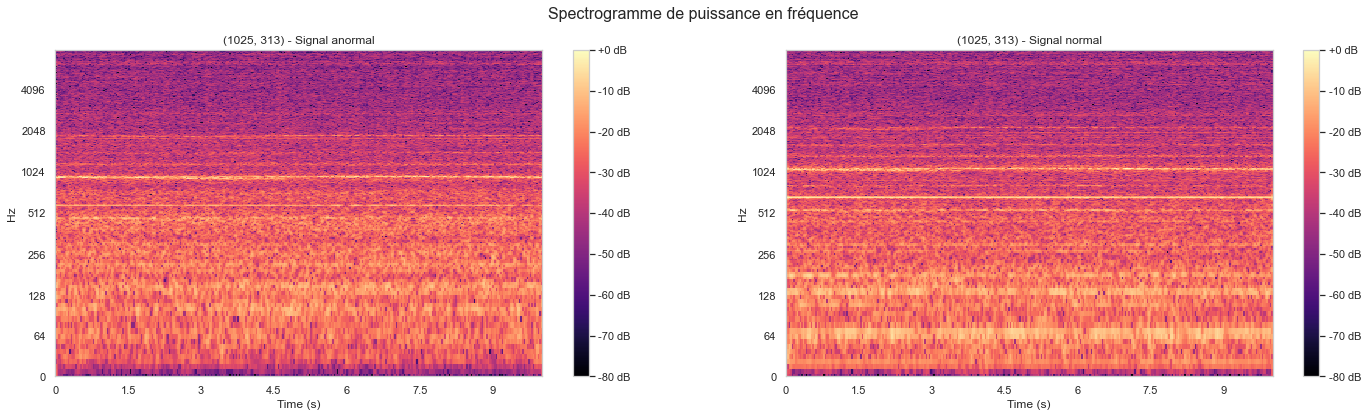

In [39]:
common.display_powerspectrogram(fan_anomaly, fan_normal, y_axis='log', size=(24, 6))

##### 3.2.1.5 Le spectrogramme Mel
Un spectrogramme mel est un spectrogramme dans lequel les fréquences sont converties dans l'échelle mel (une unité de hauteur de son telle que des distances égales dans la hauteur de son semblent également éloignées à l'audition).

L'échelle mel est une échelle logarithmique basée sur le principe que des distances égales sur l'échelle ont la même distance perceptive.

La conversion de la fréquence (f) en échelle mel (m) est donnée par

$$ m=2595 \cdot log(1+\frac{f}{500}) $$

3 étapes pour extraire un spectrogramme mel :

* 1 - Extraire la STFT
* 2 - Convertissez l'amplitude en DBs
* 3 - Conversion des fréquences en échelle de Mel

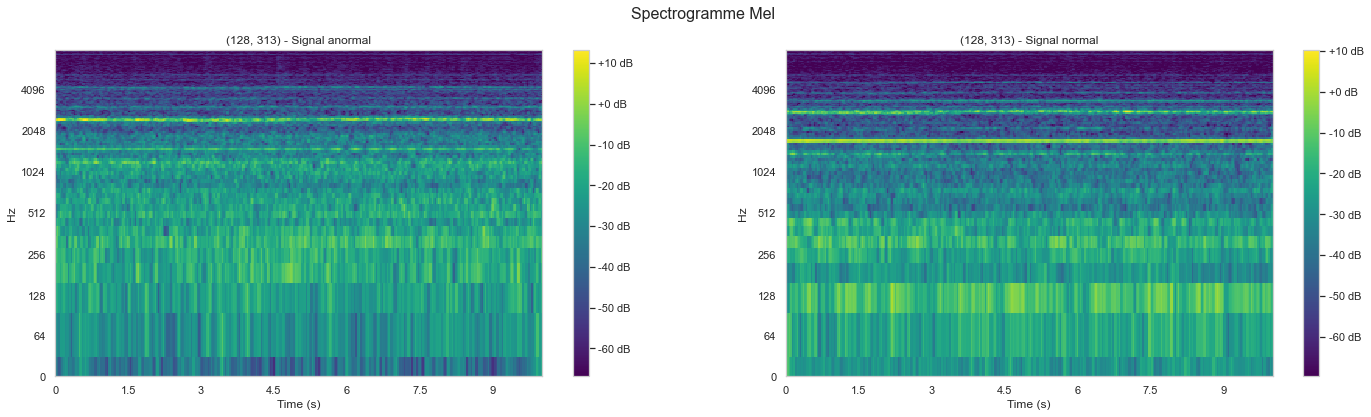

In [40]:
common.display_melspectrogram(fan_anomaly, fan_normal, y_axis='log', size=(24, 6))

##### 3.2.1.6 Le spectrogramme MFCC

Les MFCC (Mel Frequency Cepstral Coefficients) sont les coefficients qui composent collectivement un MFC, qui est une représentation du spectre de puissance à court terme d'un son, basée sur une transformation linéaire en cosinus d'un spectre de puissance logarithmique sur une échelle non linéaire de fréquence.

Les coefficients cepstraux de fréquence Mel (MFCC) d'un signal sont un petit ensemble de caractéristiques (généralement environ 10-20) qui décrivent de manière concise la forme globale d'une enveloppe spectrale. Ils modélisent les caractéristiques de la voix humaine.

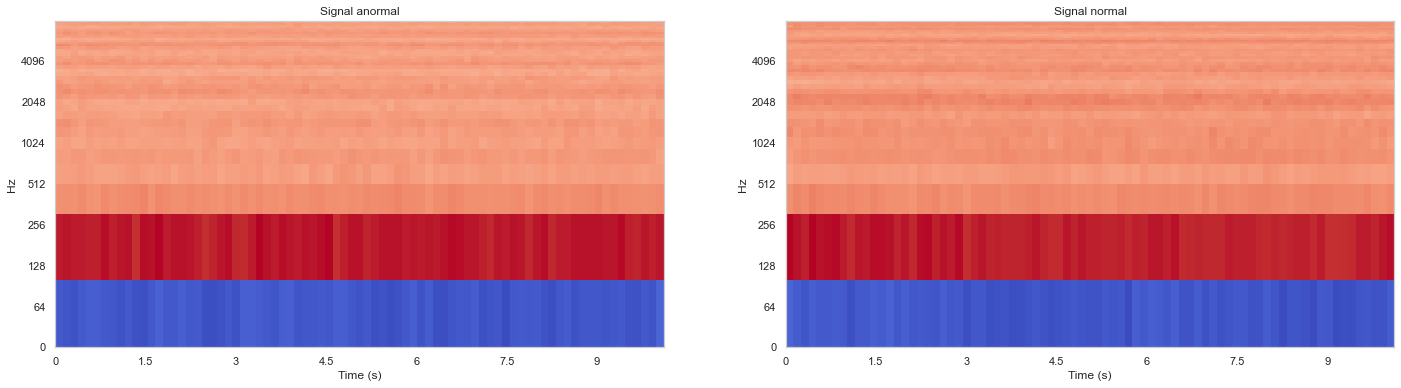

In [41]:
fig = plt.figure(figsize=(24, 6))
plt.subplot(121)
y, sr, _ = common.load_sound_file(Path(fan_anomaly))
mfccs = librosa.feature.mfcc(y, sr=sr, hop_length=hop_length, n_mels=n_mels, n_mfcc=n_mfcc)
librosa.display.specshow(mfccs, sr=sr, hop_length=hop_length, x_axis='s',  y_axis='log')
plt.title('Signal anormal')

plt.subplot(122)
y, sr, _ = common.load_sound_file(Path(fan_normal))
mfccs = librosa.feature.mfcc(y, sr=sr, hop_length=hop_length, n_mels=n_mels, n_mfcc=n_mfcc)
librosa.display.specshow(mfccs, sr=sr, hop_length=hop_length, x_axis='s',  y_axis='log');
plt.title('Signal normal')
plt.show();

### 3.3 Extraction des caractéristiques MFCC

In [42]:
# durée min des fichiers audio
duree_min = float(df['durations'].min())

#### 3.3.1 Train

In [43]:
train_mfcc_data = df[df['data_split'] == 'train'].reset_index(drop=True).copy()

In [44]:
train_mfcc_data = common.create_mfcc_data(DATASET_ROOT, train_mfcc_data, 'train_mfcc_data', 
                                     '.ftr', hop_length=hop_length, n_mfcc=n_mfcc, duration=duree_min)

Chargement du fichier <train_mfcc_data.ftr> des métadonnées audio...
Terminé.


In [45]:
train_mfcc_data = train_mfcc_data.drop(['pathname','machine_kind','data_split'], axis=1)
train_mfcc_data.sample(frac=1, random_state=50).reset_index(drop=True)

featuredf = pd.DataFrame(np.array(train_mfcc_data.feature.tolist()))
featuredf.rename(columns=lambda x : "mfcc"+str(x), inplace = True)

train_mfcc_data = train_mfcc_data.drop('feature', axis=1)
train_mfcc_data = pd.concat([train_mfcc_data, featuredf], axis=1)

print(train_mfcc_data.shape)
print(train_mfcc_data.dtypes.value_counts())
train_mfcc_data.head(2)

(20119, 3162)
float32    3160
object        2
dtype: int64


,machine_type,condition,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,mfcc27,mfcc28,mfcc29,mfcc30,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,mfcc41,mfcc42,mfcc43,mfcc44,mfcc45,mfcc46,mfcc47,mfcc48,mfcc49,mfcc50,mfcc51,mfcc52,...,mfcc3105,mfcc3106,mfcc3107,mfcc3108,mfcc3109,mfcc3110,mfcc3111,mfcc3112,mfcc3113,mfcc3114,mfcc3115,mfcc3116,mfcc3117,mfcc3118,mfcc3119,mfcc3120,mfcc3121,mfcc3122,mfcc3123,mfcc3124,mfcc3125,mfcc3126,mfcc3127,mfcc3128,mfcc3129,mfcc3130,mfcc3131,mfcc3132,mfcc3133,mfcc3134,mfcc3135,mfcc3136,mfcc3137,mfcc3138,mfcc3139,mfcc3140,mfcc3141,mfcc3142,mfcc3143,mfcc3144,mfcc3145,mfcc3146,mfcc3147,mfcc3148,mfcc3149,mfcc3150,mfcc3151,mfcc3152,mfcc3153,mfcc3154,mfcc3155,mfcc3156,mfcc3157,mfcc3158,mfcc3159
0,ToyCar,normal,-42.268044,-34.290798,-38.214417,-30.416252,-38.045906,-43.139130,-25.950741,-25.816809,-23.551151,-14.302620,-21.091698,-21.187288,-11.649162,2.372668,-11.178235,-21.915972,-23.521084,9.824868,-9.248883,-17.257883,-22.282518,6.017829,0.202506,-10.242518,-3.133062,6.465804,8.21895,11.088648,-5.433382,-10.387011,14.180757,14.157062,-4.744734,-5.839948,25.150396,12.232754,-4.051271,3.084708,27.859558,4.760149,6.259645,5.596864,21.864367,2.714386,-2.922566,24.159452,14.920692,4.646021,5.485226,19.308229,6.834790,2.164907,32.154388,...,-0.348452,-0.653051,-4.251341,-1.122974,-2.519726,-0.110914,-0.662788,-1.916741,-1.949296,-0.493284,-3.377721,-1.814059,0.110859,-3.230443,-4.012011,-4.012160,-1.294821,-1.631442,-3.263822,0.202681,-0.551838,-5.277222,-1.703351,-2.309732,-4.053520,-1.333652,-0.770985,-0.404050,-6.244891,-4.036499,-2.024420,-2.257825,-2.321225,-0.785568,0.655474,-1.205340,-1.641351,-1.648478,-0.804654,-0.886293,0.498851,0.818037,-0.843322,-2.024135,1.663710,0.126346,-3.096441,-1.466325,-0.677855,-0.216027,-3.771934,-2.747901,0.870041,-1.862856,-1.006292
1,ToyCar,normal,-55.265369,-48.214333,-54.856449,-53.340885,-44.575500,-33.396564,-34.855625,-23.418884,-30.360220,-36.558975,-35.281307,-32.924622,-33.598488,-27.799006,-28.369192,-29.625458,-22.457720,-20.164690,-22.781149,-19.778446,-23.376619,-14.491539,-13.294147,-16.349182,-23.778362,-15.238066,8.76405,-9.412023,-12.100348,-2.560264,-10.401493,-17.303133,-21.506710,-16.568893,-14.628890,-23.027481,-24.780844,-17.396454,-14.848657,-20.598969,-12.710210,-20.462208,-23.911119,-18.213362,-16.894817,-19.804796,-15.946606,-15.330070,-22.412725,-21.242800,-19.195284,-23.045975,-21.060221,...,-1.510526,-1.860681,-3.215405,0.435602,-1.496415,-0.444132,-0.633871,-0.028271,-3.407758,-2.321902,-0.551454,-2.462689,-0.781136,-0.414838,-5.241290,-1.472295,-1.204977,1.551241,0.068708,2.361989,-1.053091,0.596147,1.176581,0.330977,-2.006884,-0.893038,2.244467,-0.487703,0.359699,0.403476,-2.595715,-1.887347,-3.491991,-2.807663,-1.362550,-1.151801,-3.091700,-0.312524,-3.479184,-2.820488,-1.778351,-2.585496,1.871511,1.820847,0.957745,0.501509,-3.932303,1.230438,-3.898383,-0.412964,-3.137341,-1.497399,-5.574730,-2.926599,-2.068637


#### 3.3.2 Test

In [46]:
test_mfcc_data = df[df['data_split'] == 'test'].reset_index(drop=True).copy()

In [47]:
test_mfcc_data = common.create_mfcc_data(DATASET_ROOT, test_mfcc_data, 'test_mfcc_data', 
                                     '.ftr', hop_length=hop_length, n_mfcc=n_mfcc, duration=duree_min)

Chargement du fichier <test_mfcc_data.ftr> des métadonnées audio...
Terminé.


In [48]:
test_mfcc_data = test_mfcc_data.drop(['pathname','machine_kind','data_split'], axis=1)
test_mfcc_data.sample(frac=1, random_state=50).reset_index(drop=True)

featuredf = pd.DataFrame(np.array(test_mfcc_data.feature.tolist()))
featuredf.rename(columns=lambda x : "mfcc"+str(x), inplace = True)

test_mfcc_data = test_mfcc_data.drop('feature', axis=1)
test_mfcc_data = pd.concat([test_mfcc_data, featuredf], axis=1)

print(test_mfcc_data.shape)
print(test_mfcc_data.dtypes.value_counts())
test_mfcc_data.head(2)

(10868, 3162)
float32    3160
object        2
dtype: int64


,machine_type,condition,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,mfcc27,mfcc28,mfcc29,mfcc30,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,mfcc41,mfcc42,mfcc43,mfcc44,mfcc45,mfcc46,mfcc47,mfcc48,mfcc49,mfcc50,mfcc51,mfcc52,...,mfcc3105,mfcc3106,mfcc3107,mfcc3108,mfcc3109,mfcc3110,mfcc3111,mfcc3112,mfcc3113,mfcc3114,mfcc3115,mfcc3116,mfcc3117,mfcc3118,mfcc3119,mfcc3120,mfcc3121,mfcc3122,mfcc3123,mfcc3124,mfcc3125,mfcc3126,mfcc3127,mfcc3128,mfcc3129,mfcc3130,mfcc3131,mfcc3132,mfcc3133,mfcc3134,mfcc3135,mfcc3136,mfcc3137,mfcc3138,mfcc3139,mfcc3140,mfcc3141,mfcc3142,mfcc3143,mfcc3144,mfcc3145,mfcc3146,mfcc3147,mfcc3148,mfcc3149,mfcc3150,mfcc3151,mfcc3152,mfcc3153,mfcc3154,mfcc3155,mfcc3156,mfcc3157,mfcc3158,mfcc3159
0,ToyConveyor,normal,-25.555197,-26.677759,-1.696965,-23.900707,-13.334656,-21.051357,-26.102663,-15.139458,-26.627506,-9.697266,-19.465418,-13.675004,-15.636721,-21.671608,-8.924548,-21.125729,1.360384,-12.996376,-11.431464,-7.143551,0.69623,-4.367275,-10.714119,9.655077,-7.705634,-9.607422,-4.979707,-9.463947,0.369716,-2.958945,-2.964530,-3.561312,-4.085804,1.555521,-10.755084,-9.703255,-16.520147,-18.880716,-9.672031,-4.835660,2.093996,-1.253060,-3.604446,1.872170,-13.362104,-2.477618,4.105516,-17.032406,-18.598358,20.034361,-14.933368,-19.140583,-2.487169,...,-1.168364,-2.418128,-0.898758,-0.609730,-4.987334,-0.791507,-0.106841,-2.161180,-0.928190,-1.495171,-2.588798,-0.926434,-0.902946,0.407529,-1.653330,-1.167483,-2.729786,1.887220,0.606171,-3.030382,-0.802836,-2.837291,-1.188515,-2.517375,-0.329672,-0.167329,0.715577,-0.794004,0.602188,0.913332,-0.021434,-1.227220,0.211687,-0.510059,-1.060781,0.384324,-2.297787,-0.889680,-2.281138,0.896289,-1.097784,1.963209,-0.111863,-0.551788,0.622895,0.641674,-1.32688,-3.734957,-0.384299,-6.711108,-3.100559,-2.813491,-1.612558,2.335974,-0.687555
1,pump,normal,0.631536,1.488121,-4.730537,-1.490530,9.687370,-0.677035,3.675418,-2.502737,1.294712,-1.254096,0.152879,2.202186,7.169741,2.302865,-6.366507,-4.107543,5.369184,4.082262,-4.639551,4.519650,-5.08220,4.834575,1.297381,-7.209297,-0.163777,-1.440442,-2.308749,-3.499583,5.321750,7.009224,-1.799235,1.775096,-1.467043,2.402502,10.244869,-8.647577,-1.829163,-3.788603,1.136779,3.624571,4.549312,-3.337471,-3.755675,6.505875,-5.202173,-5.673378,1.681932,-0.945963,-3.861145,18.047642,8.036852,-8.278271,-1.073825,...,0.017588,1.468455,0.365364,3.423505,-1.383172,2.780853,-0.765128,-2.045588,0.288764,1.152388,-2.212476,0.947956,-0.541532,1.089523,0.123837,0.270825,-0.159432,0.464651,-0.987555,-0.877859,2.188769,-0.017434,2.463114,-0.338426,0.603169,1.700336,-1.562186,-1.293008,-1.714614,-0.870742,-1.915496,1.245325,-1.394632,0.878922,-1.608608,-0.524789,0.680145,0.208068,-0.038625,-0.810748,-0.793545,-0.916632,-0.216398,3.610923,0.349653,0.651514,-0.44257,0.443728,-0.116379,2.980985,-3.806376,0.499716,-0.716507,-1.264772,1.497948


#### 3.3.2 Affichage de la matrice de corrélation des variables quantitatives des caractéristiques d'entraînement

In [ ]:
df_corr = train_mfcc_data.corr()

plt.subplots(figsize=(50, 50))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr,cmap=cmap,annot=False);

![](./../images/pictures/pca_mfcc.png)


### 3.4 Extraction de caractéristiques importantes des audios des types de machines

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [51]:
# 1. Préparation des données d'entraînement et de test

X_data = train_mfcc_data.drop(['machine_type','condition'].copy(), axis=1)
y_data = train_mfcc_data['machine_type'].copy()

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=1234)

X_test = test_mfcc_data.drop(['machine_type','condition'].copy(), axis=1)
y_test = test_mfcc_data['machine_type'].copy()

# 2. Normalisation des données 
sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)
X_test_std = sc.transform(X_test)

# 3. Déterminer les caractéristiques transformées
pca = PCA(0.9)
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca = pca.transform(X_val_std)
X_test_pca = pca.transform(X_test_std)

print("Nombre de composantes retenues :", pca.n_components_)

Nombre de composantes retenues : 1272


#### 3.4.1 Visualisation des audios de différentes machines selon les 2 axes principaux

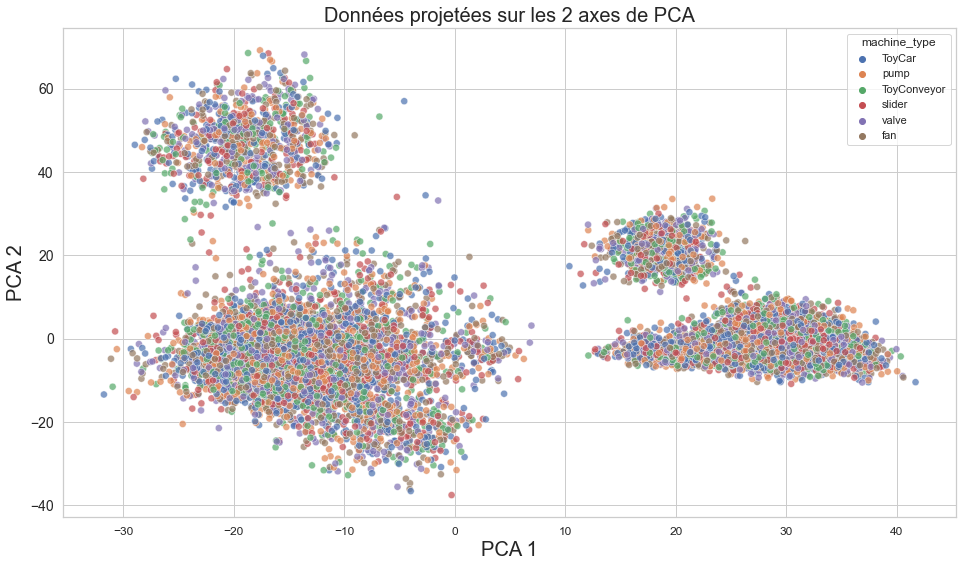

In [52]:
plt.figure(figsize = (16, 9))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel("PCA 1", fontsize = 20)
plt.ylabel("PCA 2", fontsize = 20)
plt.title('Données projetées sur les 2 axes de PCA', fontsize = 20)

principalDf = pd.DataFrame(data = X_train_pca[:,0:2], columns = ['PCA_1', 'PCA_2'])
finalDf = pd.concat([principalDf, y_train], axis = 1)

sns.scatterplot(x = "PCA_1", y = "PCA_2", data = finalDf, hue = "machine_type",palette="deep" ,alpha=0.7,s = 50)

plt.show();

## Gridsearch sur RandomForestClassifier avec PCA


In [53]:
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid,verbose=2, n_jobs = -1)
CV_rf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=2)

In [54]:
X_test_pca = pca.transform(X_test_std)

best_cv_err = 1 - CV_rf.best_score_
#
best_parameters = CV_rf.best_params_
#
best_model = CV_rf.best_estimator_
#
best_score = best_model.score(X_test_pca, y_test)
#
y_pred = best_model.predict(X_test_pca)

print(f'Taux d\'erreur : {best_cv_err:.2%}') 
print(f'Meilleur score : {best_score:.2%}') 
print(f'Meilleurs paramètres : {best_parameters}')

Taux d'erreur : 10.44%
Meilleur score : 89.92%
Meilleurs paramètres : {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}


In [55]:
y_train_pred = best_model.predict(X_train_pca)

err_train_std = np.mean(y_train != y_train_pred)

err_test_std = np.mean(y_test != y_pred)

print(err_train_std, err_test_std)

0.0 0.1007545086492455


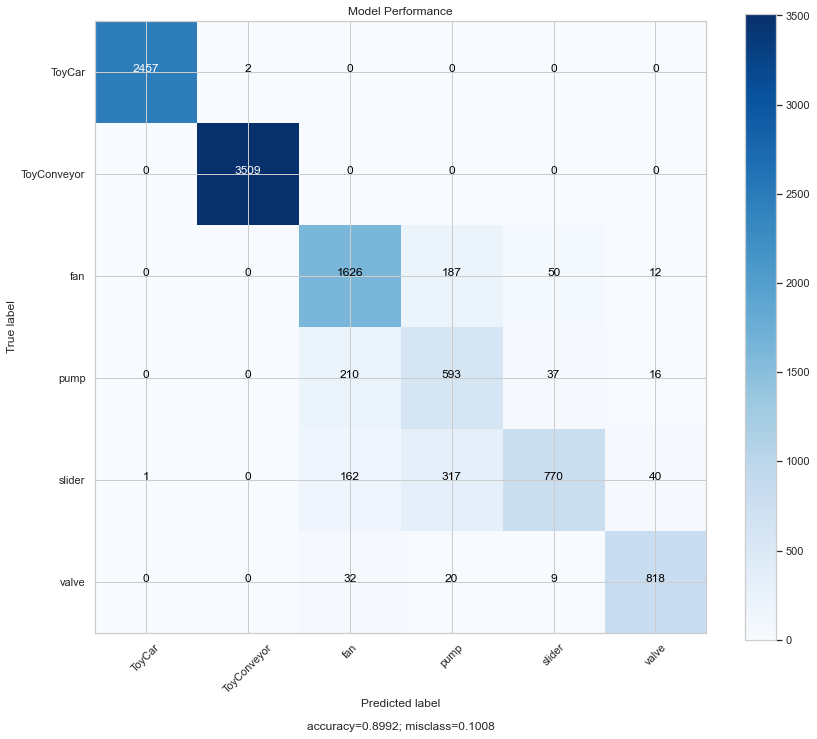

In [56]:
labels = ['ToyCar', 'ToyConveyor', 'fan', 'pump', 'slider','valve']
common.plot_confusion_matrix(y_test, y_pred, class_label=labels, title="Model Performance",size=(12,10))

In [57]:
start_time = time.time()
rf = RandomForestClassifier (n_estimators = 150, criterion = 'entropy', max_features='auto' ,n_jobs=-1)
rf.fit(X_train_pca, y_train)
y_pred = rf.predict(X_test_pca)
end_time = time.time() - start_time
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,ToyCar,ToyConveyor,fan,pump,slider,valve
Classe réelle,,,,,,
ToyCar,2455,4,0,0,0,0
ToyConveyor,1,3508,0,0,0,0
fan,0,0,1606,190,55,24
pump,1,0,201,589,44,21
slider,2,1,184,315,722,66
valve,0,0,27,19,9,824


In [58]:
print(f'Score : {rf.score(X_test_pca,y_test):.2%}') 
print("--- %s seconds ---" % end_time)

Score : 89.29%
--- 39.81983947753906 seconds ---


## Prédiction avec le modèle RandomForest avec PCA

Nous allons essayer de prédire l'aspect normal ou anormal d'un son de machine en utilisant le modèle Random Forrest optimisé

In [59]:
y_pred_rf = rf.predict(X_test_pca)
pd.crosstab(y_test, y_pred_rf, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,ToyCar,ToyConveyor,fan,pump,slider,valve
Classe réelle,,,,,,
ToyCar,2455,4,0,0,0,0
ToyConveyor,1,3508,0,0,0,0
fan,0,0,1606,190,55,24
pump,1,0,201,589,44,21
slider,2,1,184,315,722,66
valve,0,0,27,19,9,824


In [60]:
result_rf = pd.concat([test_mfcc_data, pd.Series(y_pred_rf).rename('Predict_type')], axis=1)
result_rf.loc[result_rf['machine_type'] == result_rf['Predict_type'], 'Predict_condition'] = 'normal'  
result_rf.loc[result_rf['machine_type'] != result_rf['Predict_type'], 'Predict_condition'] = 'anomaly'
pd.crosstab(result_rf.condition, result_rf.Predict_condition, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,anomaly,normal
Classe réelle,,
anomaly,931,4538
normal,233,5166


In [61]:
pd.crosstab(index=[result_rf.machine_type, result_rf.condition], columns=result_rf.Predict_condition)

Predict_condition       anomaly  normal
machine_type condition                 
ToyCar       anomaly          1    1058
             normal           3    1397
ToyConveyor  anomaly          1    1109
             normal           0    2399
fan          anomaly        239    1236
             normal          30     370
pump         anomaly        203     253
             normal          64     336
slider       anomaly        435     455
             normal         133     267
valve        anomaly         52     427
             normal           3     397

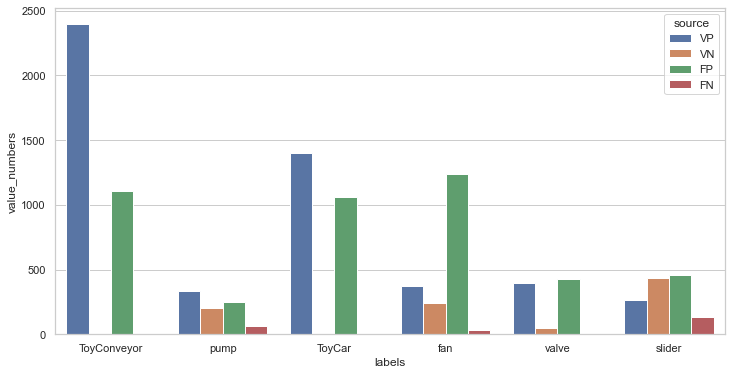

In [62]:
colonne = result_rf.machine_type.unique().tolist()

dict_analyse = {}
VP, VN, FP, FN = [], [], [], []
for col in colonne:
    VP.append (result_rf [(result_rf['condition'] == "normal" ) & (result_rf['Predict_condition'] == "normal") & (result_rf['machine_type'] == col) ].shape[0])
    VN.append (result_rf [(result_rf['condition'] == "anomaly" ) & (result_rf['Predict_condition'] == "anomaly") & (result_rf['machine_type'] == col) ].shape[0])
    FP.append (result_rf [(result_rf['condition'] == "anomaly" ) & (result_rf['Predict_condition'] == "normal") & (result_rf['machine_type'] == col) ].shape[0])
    FN.append (result_rf [(result_rf['condition'] == "normal" ) & (result_rf['Predict_condition'] == "anomaly") & (result_rf['machine_type'] == col) ].shape[0])
    
dict_analyse ['labels'] = colonne
dict_analyse ['VP'] = VP
dict_analyse ['VN'] = VN
dict_analyse ['FP'] = FP
dict_analyse ['FN'] = FN

analyse = pd.DataFrame(dict_analyse)

columns = ["labels", "VP", "VN", "FP", "FN"]
analyse_melted = pd.melt(analyse, id_vars=columns[0], var_name="source", value_name="value_numbers")
fig = plt.figure(figsize=(12.0, 6.0))
g = sns.barplot(x=columns[0], y="value_numbers", hue="source", data=analyse_melted)
plt.show()